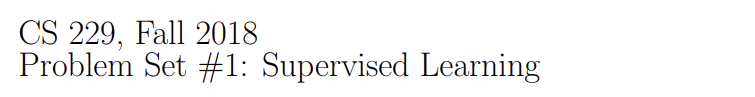

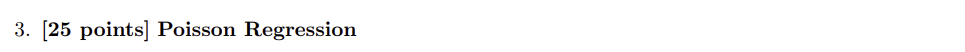

# **(a)**
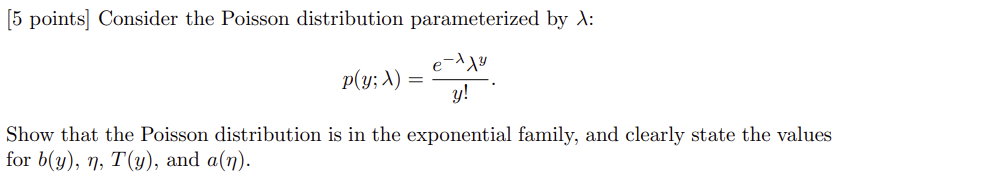

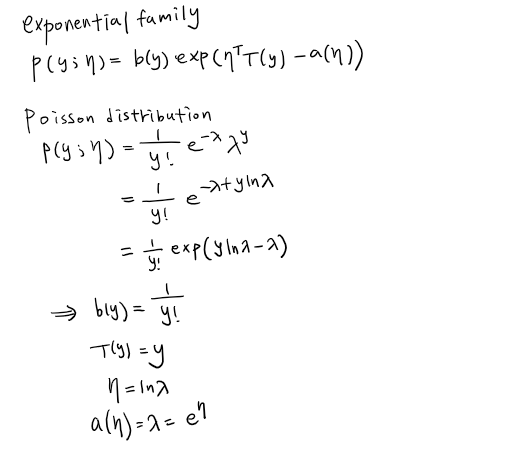

# **(b)**
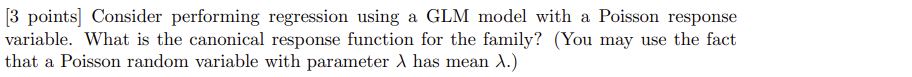

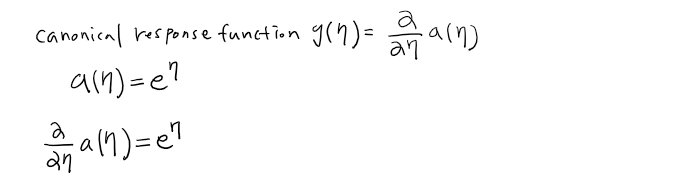

# **(c)**
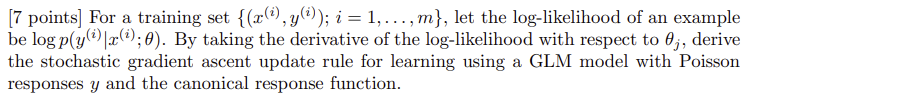

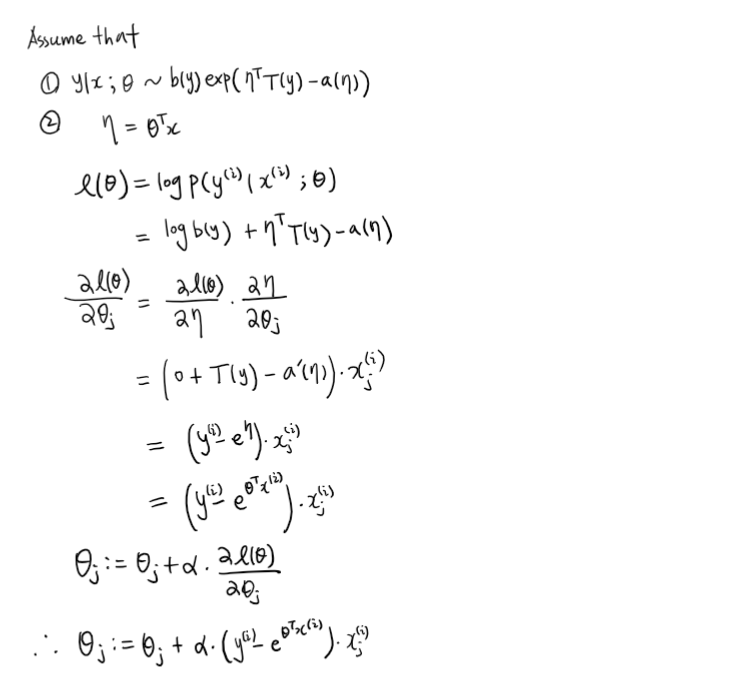

# **(d)**
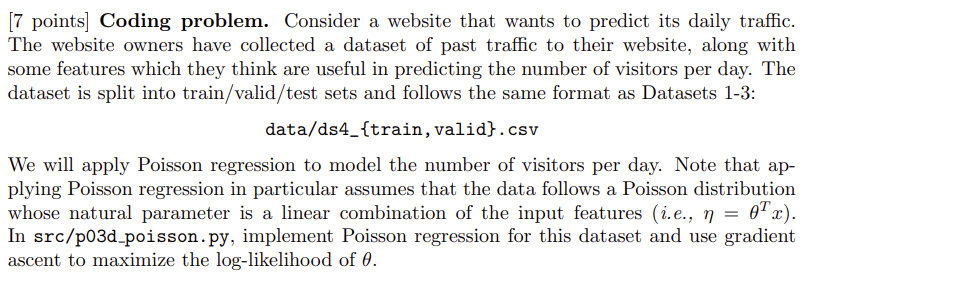

In [1]:
import numpy as np
import src.util as util
import matplotlib.pyplot as plt

from src.linear_model import LinearModel
# src 폴더 안에 linear_model.py 파일에서 LinearModel 의 class 를 가져온다.

In [2]:
# data 폴더에서 csv 형식의 training, validation 데이터를 불러온다.
# 'add_intercept=True': linear combination 에서 상수항을 고려한다.
x_train, y_train = util.load_dataset('data/ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds4_valid.csv', add_intercept=True)

In [3]:
x_train.shape

(2500, 5)

In [4]:
# LinearModel 의 class 의 기능들을 바탕으로 새로운 Poisson Regression 의 class 를 생성한다.
class PoissonRegression(LinearModel):
    # fit 함수는 주어진 학습 데이터를 바탕으로 최선의 Poisson Regression 모델을 찾는다.
    # 혹은 최선의 Poisson Regression 모델에 적합한 모수 theta 를 찾는다고 말할 수 있다.
    # arg 에 self 추가한 이유: 나(어떤 object)만의 parameters 를 호출하거나 함수 안에서 업데이트 하기 위해서.
    def fit(self, x, y):
        """
        Args:
            x: Training example inputs of shape (m, n)
            y: Training example labels of shape (m,)
        """

        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros((n,))  # initialize theta
        alpha = self.step_size

        for _ in range(self.max_iter):
            h = np.exp(x @ self.theta)  # (m,n) @ (n,) = (m,)
            new_theta = self.theta + (alpha * 1/m * (x.T @ (y - h)))  # (n,m) @ (m,) = (n,)
                                                                      # 1/m * (x.T @ (y - h)): mean over all m examples on each element
                                                                      # theta +: gradient ascent update
            # np.linalg.norm: norm 반환
            if np.linalg.norm(new_theta - self.theta, 1) < self.eps:
                self.theta = new_theta
                break
            self.theta = new_theta

    # predict 함수는 fit 함수로부터 찾은 모수 theta 를 토대로 새로운 입력 데이터에 대한 target 값을 예측한다.
    def predict(self, x):
        """
        Args:
            x: Inputs of shape (m, n)
        """

        return np.exp(x @ self.theta)  # (m, n) @ (n,) = (m,)

In [5]:
# 객체 생성 clf(= classifier)
clf = PoissonRegression(step_size=2e-7, max_iter=10000)

In [6]:
clf.fit(x_train, y_train)

In [7]:
print("최적의 Theta:", clf.theta)
print("학습 RMSE:", np.sqrt(np.mean((clf.predict(x_train) - y_train)**2)))
print("검증 RMSE:", np.sqrt(np.mean((clf.predict(x_valid) - y_valid)**2)))

최적의 Theta: [7.36648672 3.93325668 3.43323004 2.00011232 4.40022571]
학습 RMSE: 1860.2739901700754
검증 RMSE: 1942.1682536237188


In [8]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'ro')
    plt.plot(y_pred, 'bx')
    plt.title(title)

In [9]:
# plot 함수로부터 생성되는 plot 의 x 좌표는 data 의 index, y 좌표는 data 의 value 에 해당한다.

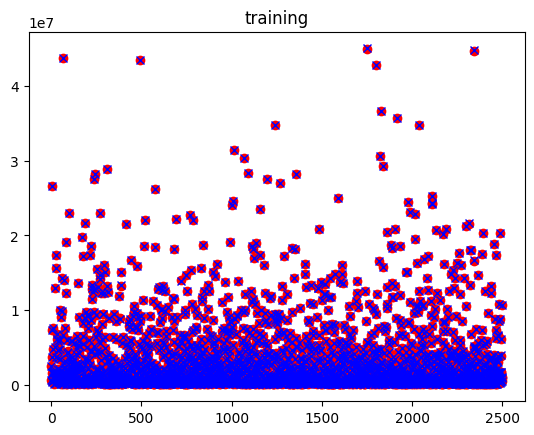

In [10]:
plot(y_train, clf.predict(x_train), 'training')

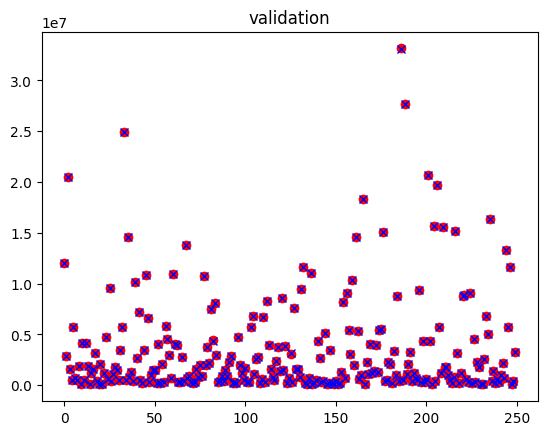

In [11]:
plot(y_valid, clf.predict(x_valid), 'validation')